### Contagem das palavras mais usadas no Plano de governo do PSDB

#### Importacao de bibliotecas

In [1]:
import pandas as pd
import numpy as np
# http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from nltk import *
from matplotlib import pyplot as plt
%matplotlib inline

### Link do plano de governo

- [Plano de governo](http://www.psdb.org.br/wp-content/uploads/biblioteca/66275971.pdf)

### Conversao pdf to text

- Utilizei esse site on-line [https://pdftotext.com/](https://pdftotext.com/)

### Leitura do arquivo transformado em texto do original em pdf

In [2]:
with open('text/plano_governo_alckmin.txt', 'r', encoding='UTF-8') as pl:
    big_string = ''
    for line in pl:
        split_line = line.split(' ')
        for word in split_line:
            big_string = big_string + ' ' + word

In [3]:
# criacao de lista de simbolos de pontuacao
punctuation = string.punctuation

In [4]:
# removendo quebras de linha '\n'
big_string = big_string.replace('\n ', ' ')

In [5]:
# retirando pontuacao
for p in punctuation:
    big_string = big_string.replace(p, '')

In [6]:
# convertendo tudo para lower case
big_string = big_string.lower()

In [7]:
# checando a conversao
big_string[0:1000]

' 1170  \x0c2170  i estratégica do desenvolvimento caminhos para crescer o brasil no contexto mundial o brasil venceu duas batalhas decisivas na década passada – a da consolidação da democracia e a da estabilidade econômica o grande desafio que temos pela frente hoje é o do desenvolvimento nos últimos quase quatro anos não só aumentou a distância que nos separa dos países altamente desenvolvidos como estamos crescendo menos do que quase todas as nações em desenvolvimento e o que é pior muito menos do que poderíamos e precisaríamos para dar empregos e oportunidades aos nossos filhos vários países que na década de 1950 eram mais pobres do que somos hoje deram o salto do subdesenvolvimento para o desenvolvimento no prazo de uma geração china e índia estão caminhando a passos largos na mesma direção por que estaríamos condenados a ser retardatários nessa corrida respondo que o brasil com seus excepcionais recursos humanos com seus riquíssimos recursos naturais – destacandose por exemplo co

In [8]:
# comprimento da string
len(big_string)

202204

In [9]:
# nltk.download() # rodar apenas uma vez para baixar os pacotes

In [10]:
# lista de stopwords em portugues
stop_words = stopwords.words('portuguese')

In [11]:
# numero de stopwords
len(stop_words)

203

In [12]:
# aparando os detalhes
full_text = big_string
for s_word in stop_words:
    s_word = ' ' + s_word + ' '
    full_text = full_text.replace(s_word, ' ')
    full_text = full_text.replace(' é ', ' ')
    full_text = full_text.replace(' – ', ' ')
    full_text = full_text.replace(' • ', ' ')

In [13]:
# tamanho do texto apos limpeza
len(full_text)

163643

In [14]:
# quantidade de caracteres removidos
len(big_string)-len(full_text)

38561

In [15]:
# transformando a string em lista
full_text = [full_text]

In [16]:
# separando palavra por palavra
freq_full_text = full_text[0].split(' ')

### Documentacao FreqDist

- [FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist)

In [17]:
# Contando a frequencia de cada palavra com a funcao FreqDist
freq_full_text = FreqDist(freq_full_text)

In [18]:
# as 100 palavras mais comuns
hundred_most_common = freq_full_text.most_common(100)
# removendo primeiro elemento da lista ''
hundred_most_common = hundred_most_common[1:]
# imprime as 10 primeiras
hundred_most_common[:9]

[('governo', 133),
 ('desenvolvimento', 102),
 ('brasil', 91),
 ('nacional', 90),
 ('recursos', 89),
 ('política', 81),
 ('país', 79),
 ('programa', 78),
 ('região', 76)]

In [19]:
# 
x = []
y = []
for i in hundred_most_common[0:29]:
    x.append(i[0])
    y.append(i[1])

In [20]:
d = {'palavra': x, 'frequencia': y}
df_r = pd.DataFrame(d)

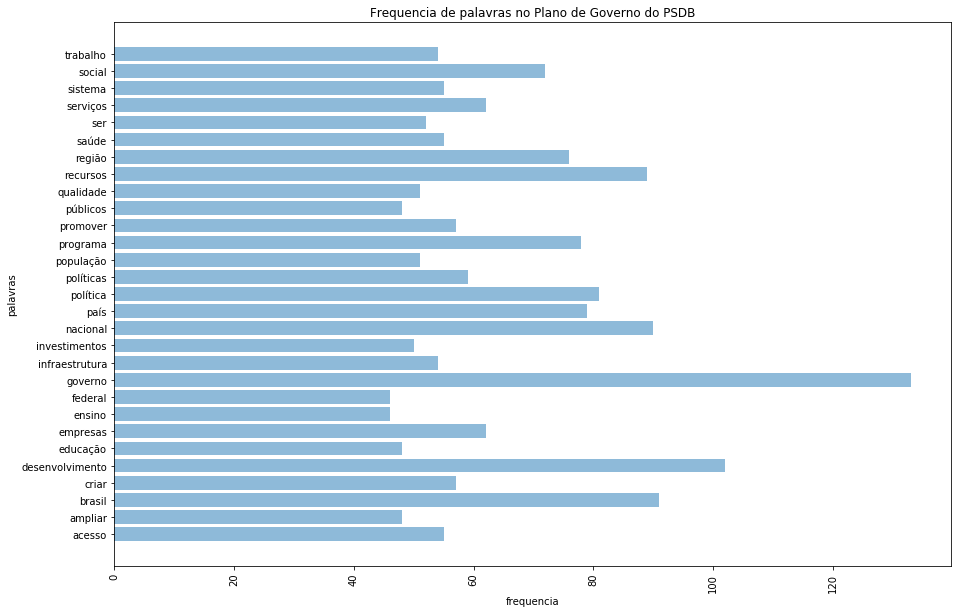

In [21]:
plt.figure(figsize=(15,10))
plt.barh(df_r.palavra, df_r.frequencia, align='center', alpha=0.5)
plt.title("Frequencia de palavras no Plano de Governo do PSDB")
plt.xticks(rotation=90)
plt.xlabel('frequencia')
plt.ylabel('palavras')
plt.show()


In [22]:
# Lista completa das 100 mais frequentes
hundred_most_common

[('governo', 133),
 ('desenvolvimento', 102),
 ('brasil', 91),
 ('nacional', 90),
 ('recursos', 89),
 ('política', 81),
 ('país', 79),
 ('programa', 78),
 ('região', 76),
 ('social', 72),
 ('empresas', 62),
 ('serviços', 62),
 ('políticas', 59),
 ('criar', 57),
 ('promover', 57),
 ('sistema', 55),
 ('acesso', 55),
 ('saúde', 55),
 ('trabalho', 54),
 ('infraestrutura', 54),
 ('ser', 52),
 ('população', 51),
 ('qualidade', 51),
 ('investimentos', 50),
 ('ampliar', 48),
 ('públicos', 48),
 ('educação', 48),
 ('federal', 46),
 ('ensino', 46),
 ('renda', 45),
 ('alckmin', 45),
 ('condições', 45),
 ('milhões', 45),
 ('crescimento', 44),
 ('geraldo', 44),
 ('setor', 44),
 ('municípios', 43),
 ('meio', 42),
 ('estado', 42),
 ('público', 40),
 ('nordeste', 40),
 ('brasileira', 39),
 ('estados', 39),
 ('hoje', 38),
 ('cada', 38),
 ('forma', 38),
 ('áreas', 37),
 ('esporte', 37),
 ('gestão', 36),
 ('economia', 36),
 ('segurança', 36),
 ('ações', 36),
 ('públicas', 36),
 ('formação', 36),
 ('produ

In [23]:
words = []
for i in hundred_most_common:
    words.append(i[0])
words[:9]

['governo',
 'desenvolvimento',
 'brasil',
 'nacional',
 'recursos',
 'política',
 'país',
 'programa',
 'região']

In [24]:
text = full_text[0].split(' ')
freq_exp = {}
for i in range(len(words)):
    for j in range(len(text)):
        if words[i] == text[j]:
            if text[j-1]:
                string = text[j-1] + ' ' + text[j] + ' ' + text[j+1]
                if not string in freq_exp:
                    freq_exp[string] = 1
                else:
                    freq_exp[string] = freq_exp[string] + 1

In [25]:
# lista das expressoes mais frequentes no texto que usam palavras mais frequentes (lista anterior)
for key, value in freq_exp.items():
    if value >=3:
        print(key, value)

políticas desenvolvimento região 3
financiada recursos orçamentários 3
criar programa nacional 4
coordenação políticas desenvolvimento 3
oportunidades trabalho emprego 3
melhoria qualidade ensino 3
custos investimentos privados 3
geraldo alckmin vai 13
criar condições ampliar 3
governo geraldo alckmin 39
estados municípios iniciativa 3
preservação meio ambiente 3
novo nordeste  3
conjunto estados municípios 3
união estados municípios 6
trabalho emprego renda 3
programa novo nordeste 4
programa novo norte 3
